## All Imports

In [17]:
import pandas as pd
from regex import P 
from torchvision import datasets, transforms 
from torch.utils.data import Dataset, DataLoader 
import matplotlib.pyplot as plt 
import numpy as np 

## Create a Custom Dataset

In [2]:
class CustomDataset(Dataset):
     def __init__(self, data_path, burget=152):
          df = pd.read_csv(data_path)
          df.columns = [x.replace('"', '').replace(' ', '') for x in df.columns]
          columns = ['Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres', 'Taxes']
          self.X = df[columns].values
          self.y = (df['Sell'].values <= burget).astype('int')
          # self.y = df['Sell'].values 
          self.n_samples = self.X.shape[0]

     def __getitem__(self, index):
          return self.X[index], self.y[index]
     
     def __len__(self):
          return self.n_samples

## Load Data

In [3]:
data = CustomDataset('data/homes.csv')
data_loader = DataLoader(dataset=data, batch_size=5, shuffle=True)
data_iteration = iter(data_loader)
dt = data_iteration.next()

## Apply Transformations

In [10]:

train_transfomations = transforms.Compose([  transforms.Resize(255), 
                                             transforms.RandomResizedCrop(244),
                                             transforms.RandomHorizontalFlip(p=0.5), 
                                             transforms.RandomRotation(20), 
                                             transforms.ToTensor(), 
                                             transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                                          ])


test_transformations = transforms.Compose([  transforms.Resize(255), 
                                             transforms.CenterCrop(244), 
                                             transforms.ToTensor(), 
                                             transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])                                        
                                          ])

## Download Dataset

In [12]:
# parent_root  = "C:/Users/zorve/OneDrive/Documents/github/3.4.__Deep_Learning__Data_Loader/"
parent_root  = "C:/Users/zorve/OneDrive/Documents/github/3.4.__Deep_Learning__Data_Loader/"

train_dataset = datasets.ImageFolder(root= parent_root + 'train', transform=train_transfomations)
test_dataset  = datasets.ImageFolder(root= parent_root + 'test',  transform=test_transformations)

In [13]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataloader  = DataLoader(dataset=test_dataset,  batch_size=32, shuffle=True)

## Function to Plot the Result

In [16]:
def imshow(image, ax=None, title=None, normalize=False):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    plt.show()

    return ax

## Show the Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


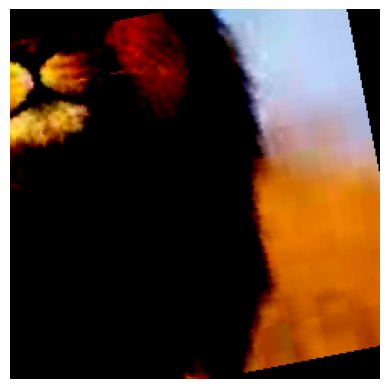

<AxesSubplot: >

In [15]:
images, labels = next(iter(train_dataloader))
imshow(images[0], normalize=False)

## New Dataset

In [ ]:
class NewDataset(Dataset):
     def __init__(self, path, budget):
          df = pd.read_csv(path)
          df.columns = [x.replace('"', '').replace(' ', '') for x in df.columns]
          columns = ['List', 'Living', 'Rooms']
          self.X = df[columns].values 
          self.y = (df['Sell'].values >= budget).astype('int')
          self.number = self.X.shape[0]
     
     def __len__(self):
          return self.number

     def __getitem__(self, index):
          return self.X[index], self.y[index]

data = NewDataset('data/homes.csv', 150)
data_loader = DataLoader(dataset=data, batch_size=8, shuffle=True)
data_iter = iter(data_loader)
data_next = next(data_iter)